In [ ]:
import pandas as pd
data=pd.read_csv("/content/kc_house_data.csv")
print(data.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
if 'id' in data.columns:
  print("Shape of the dataframe before removing duplicates: ", data.shape)
  new_data = data.drop_duplicates(subset=['id'], keep='first')
  print("Shape of the dataframe after removing duplicates based on 'id': ", new_data.shape)
else:
  print("The 'id' column is not present in the dataframe.")


Shape of the dataframe before removing duplicates:  (21613, 21)
Shape of the dataframe after removing duplicates based on 'id':  (21436, 21)


In [ ]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21436 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   date           21436 non-null  object 
 2   price          21436 non-null  float64
 3   bedrooms       21436 non-null  int64  
 4   bathrooms      21436 non-null  float64
 5   sqft_living    21436 non-null  int64  
 6   sqft_lot       21436 non-null  int64  
 7   floors         21436 non-null  float64
 8   waterfront     21436 non-null  int64  
 9   view           21436 non-null  int64  
 10  condition      21436 non-null  int64  
 11  grade          21436 non-null  int64  
 12  sqft_above     21436 non-null  int64  
 13  sqft_basement  21436 non-null  int64  
 14  yr_built       21436 non-null  int64  
 15  yr_renovated   21436 non-null  int64  
 16  zipcode        21436 non-null  int64  
 17  lat            21436 non-null  float64
 18  long       

In [ ]:
new_data=new_data.copy()
new_data['date'] = pd.to_datetime(new_data['date'])
new_data['year_sold'] = new_data['date'].dt.year
new_data['month_sold'] = new_data['date'].dt.month
new_data['day_sold'] = new_data['date'].dt.day

display(new_data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [ ]:
new_data['house_age'] = new_data['year_sold'] - new_data['yr_built']
display(new_data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,28


In [ ]:
new_data['renovated'] = new_data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
display(new_data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,house_age,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,10,13,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,12,9,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,12,9,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,2,18,28,0


In [ ]:

new_data['sqft_ratio'] = new_data['sqft_living'] /( new_data['sqft_lot'] + 1)

new_data['sqft_diff'] = new_data['sqft_living'] - new_data['sqft_lot']

display(new_data[['sqft_living', 'sqft_lot', 'sqft_ratio', 'sqft_diff']].head())

,sqft_living,sqft_lot,sqft_ratio,sqft_diff
0,1180,5650,0.208813,-4470
1,2570,7242,0.354825,-4672
2,770,10000,0.076992,-9230
3,1960,5000,0.391922,-3040
4,1680,8080,0.207895,-6400


In [ ]:

new_data['above_to_basement_ratio'] = new_data['sqft_above'] / (new_data['sqft_basement'] + 1)

new_data['above_minus_basement'] = new_data['sqft_above'] - new_data['sqft_basement']

display(new_data[['sqft_above', 'sqft_basement', 'above_to_basement_ratio', 'above_minus_basement']].head())

,sqft_above,sqft_basement,above_to_basement_ratio,above_minus_basement
0,1180,0,1180.000000,1180
1,2170,400,5.411471,1770
2,770,0,770.000000,770
3,1050,910,1.152580,140
4,1680,0,1680.000000,1680


In [ ]:

new_data['sqft_living_to_15_ratio'] = new_data['sqft_living'] / (new_data['sqft_living15'] + 1)

new_data['sqft_living_minus_15'] = new_data['sqft_living'] - new_data['sqft_living15']

display(new_data[['sqft_living', 'sqft_living15', 'sqft_living_to_15_ratio', 'sqft_living_minus_15']].head())

,sqft_living,sqft_living15,sqft_living_to_15_ratio,sqft_living_minus_15
0,1180,1340,0.879940,-160
1,2570,1690,1.519811,880
2,770,2720,0.282984,-1950
3,1960,1360,1.440118,600
4,1680,1800,0.932815,-120


In [ ]:
new_data['sqft_lot_to_15_ratio'] = new_data['sqft_lot'] / (new_data['sqft_lot15'] + 1)

new_data['sqft_lot_minus_15'] = new_data['sqft_lot'] - new_data['sqft_lot15']

display(new_data[['sqft_lot', 'sqft_lot15', 'sqft_lot_to_15_ratio', 'sqft_lot_minus_15']].head())

,sqft_lot,sqft_lot15,sqft_lot_to_15_ratio,sqft_lot_minus_15
0,5650,5650,0.999823,0
1,7242,7639,0.947906,-397
2,10000,8062,1.240233,1938
3,5000,5000,0.999800,0
4,8080,7503,1.076759,577


In [ ]:

new_data['bath_per_bed'] = new_data['bathrooms'] / (new_data['bedrooms'] + 1)
display(new_data[['bedrooms', 'bathrooms', 'bath_per_bed']].head())

,bedrooms,bathrooms,bath_per_bed
0,3,1.00,0.250000
1,3,2.25,0.562500
2,2,1.00,0.333333
3,4,3.00,0.600000
4,3,2.00,0.500000


In [ ]:
from sklearn.model_selection import train_test_split

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
            'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold', 'day_sold',
            'house_age', 'renovated', 'sqft_ratio', 'sqft_diff',
            'above_to_basement_ratio', 'above_minus_basement',
            'sqft_living_to_15_ratio', 'sqft_living_minus_15',
            'sqft_lot_to_15_ratio', 'sqft_lot_minus_15', 'bath_per_bed']

X = new_data[features].copy()
y = new_data['price'].copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data_for_zip_calc = X_train.copy()
train_data_for_zip_calc['price'] = y_train
train_data_for_zip_calc['price_per_sqft'] = train_data_for_zip_calc['price'] / train_data_for_zip_calc['sqft_living']

avg_pps_zip_train = train_data_for_zip_calc.groupby('zipcode')['price_per_sqft'].mean()

X_train['avg_pps_zip'] = X_train['zipcode'].map(avg_pps_zip_train)
X_test['avg_pps_zip'] = X_test['zipcode'].map(avg_pps_zip_train)

overall_avg_pps_train = train_data_for_zip_calc['price_per_sqft'].mean()
X_test['avg_pps_zip'] = X_test['avg_pps_zip'].fillna(overall_avg_pps_train)

print("X_train with new feature:")
display(X_train.head())

print("\nX_test with new feature:")
display(X_test.head())

X_train with new feature:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sqft_ratio,sqft_diff,above_to_basement_ratio,above_minus_basement,sqft_living_to_15_ratio,sqft_living_minus_15,sqft_lot_to_15_ratio,sqft_lot_minus_15,bath_per_bed,avg_pps_zip
5300,2,1.00,1670,14695,1.5,0,0,5,7,1670,...,0.113636,-13025,1670.000000,1670,0.927263,-130,1.294030,3340,0.333333,345.282930
11670,4,1.50,1100,11824,1.0,0,0,4,7,1100,...,0.093023,-10724,1100.000000,1100,0.796524,-280,1.002289,28,0.300000,297.092237
21329,3,2.50,1440,1102,3.0,0,0,3,8,1440,...,1.305530,338,1440.000000,1440,0.999306,0,0.767944,-332,0.625000,368.567894
6672,3,2.50,2830,9680,2.0,0,0,3,10,2830,...,0.292325,-6850,2830.000000,2830,0.952541,-140,1.113668,989,0.625000,266.939682
5318,3,1.75,1640,17583,1.0,0,0,3,7,1110,...,0.093267,-15943,2.090395,580,1.154117,220,1.505265,5903,0.437500,268.242708



X_test with new feature:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sqft_ratio,sqft_diff,above_to_basement_ratio,above_minus_basement,sqft_living_to_15_ratio,sqft_living_minus_15,sqft_lot_to_15_ratio,sqft_lot_minus_15,bath_per_bed,avg_pps_zip
6355,4,3.50,2820,7809,2.0,0,0,3,10,2820,...,0.361076,-4989,2820.000000,2820,1.071836,190,0.987856,-95,0.7000,476.516529
20958,4,2.75,1830,3420,2.0,0,0,3,8,1830,...,0.534931,-1590,1830.000000,1830,1.008820,17,0.999708,0,0.5500,178.006651
1226,3,1.50,1200,11935,1.0,0,0,4,7,1200,...,0.100536,-10735,1200.000000,1200,0.888231,-150,0.999916,0,0.3750,164.400869
1927,3,1.75,1460,6360,1.0,0,2,3,7,1010,...,0.229524,-4900,2.239468,560,1.042113,60,1.499646,2120,0.4375,231.071566
17776,3,2.50,2160,6000,1.5,0,0,4,8,1880,...,0.359940,-3840,6.690391,1600,0.938722,-140,0.999833,0,0.6250,405.238865


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
      n_estimators=800,
    learning_rate=0.03,
    max_depth=3,
    min_child_weight=15,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.3,
    reg_lambda=2.0,
    random_state=42

)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=15, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mean_price = y.mean()

print("XGBoost Regression Metrics:")
print(f"MAE: {mae:.2f} ({mae / mean_price * 100:.2f}%)")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} ({rmse / mean_price * 100:.2f}%)")
print(f"R-squared: {r2 * 100:.2f}%")

XGBoost Regression Metrics:
MAE: 65146.91 (12.05%)
MSE: 11821417340.71
RMSE: 108726.34 (20.11%)
R-squared: 90.00%


In [ ]:
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)


mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

mean_price_test = y_test.mean()


print("XGBoost Regression Metrics (Test Set):")
print(f"MAE: {mae_test:.2f} ({mae_test / mean_price_test * 100:.2f}%)")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f} ({rmse_test / mean_price_test * 100:.2f}%)")
print(f"R-squared: {r2_test * 100:.2f}%")

# Evaluate the model on the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mean_price_train = y_train.mean()

print("\nXGBoost Regression Metrics (Training Set):")
print(f"MAE: {mae_train:.2f} ({mae_train / mean_price_train * 100:.2f}%)")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f} ({rmse_train / mean_price_train * 100:.2f}%)")
print(f"R-squared: {r2_train * 100:.2f}%")

XGBoost Regression Metrics (Test Set):
MAE: 65146.91 (12.25%)
MSE: 11821417340.71
RMSE: 108726.34 (20.44%)
R-squared: 90.00%

XGBoost Regression Metrics (Training Set):
MAE: 62743.84 (11.56%)
MSE: 10030252543.79
RMSE: 100151.15 (18.45%)
R-squared: 92.80%


In [ ]:

feature_importances = xgb_model.feature_importances_

feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
display(sorted_feature_importances)

Feature Importances:


,0
grade,0.249846
sqft_living,0.175314
avg_pps_zip,0.117664
waterfront,0.101517
view,0.058600
sqft_above,0.041328
sqft_living15,0.036470
lat,0.027623
renovated,0.019190
house_age,0.018631


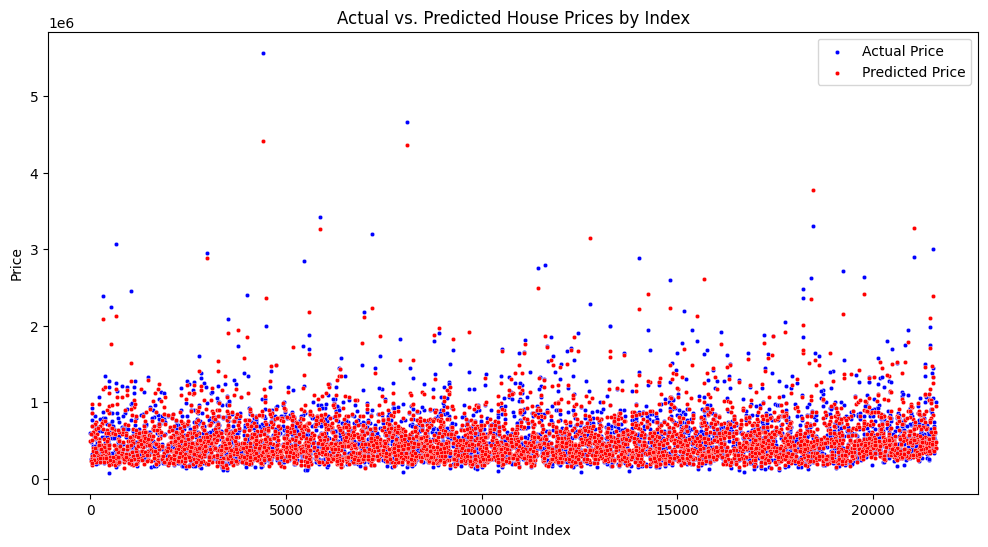

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot actual prices
sns.scatterplot(x=y_test.index, y=y_test, color='blue', label='Actual Price', s=10)

# Plot predicted prices
sns.scatterplot(x=y_test.index, y=y_pred_test, color='red', label='Predicted Price', s=10)

plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.title("Actual vs. Predicted House Prices by Index")
plt.legend()
plt.show()

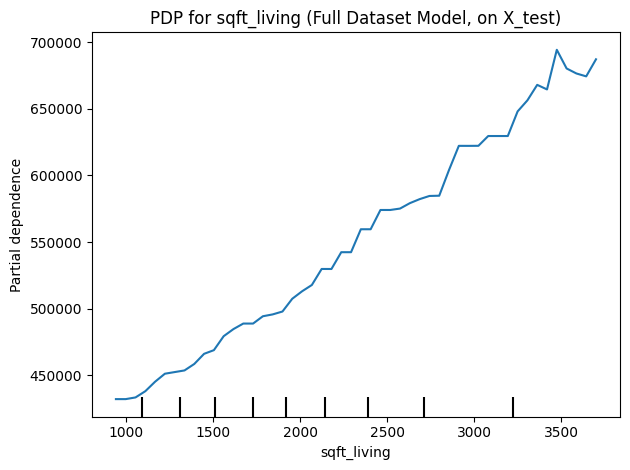

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


disp = PartialDependenceDisplay.from_estimator(
    xgb_model,
    X_test,
    features=['sqft_living'],
    kind='average',
    grid_resolution=50,
    feature_names=X_test.columns


)

plt.title('PDP for sqft_living (Full Dataset Model, on X_test)')
plt.tight_layout()
plt.show()

In [ ]:
!pip install shap

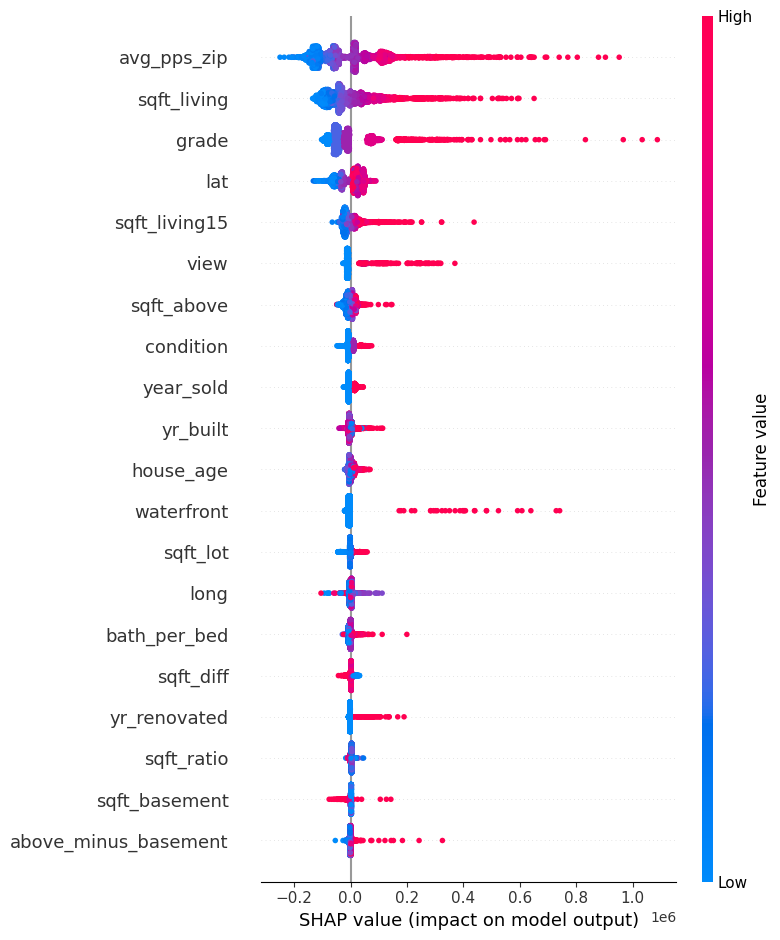

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot( shap_values,X_test)